## Decision Tree Assignment


About the data:

Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
#Import Libraries
# Import necessary libraries for data manipulation, visualization, and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the Dataset
# Load the dataset from a CSV file
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
#Data Exploration
# Check for missing values in the dataset
data.isnull().sum()

# Display the shape of the dataset
data.shape

# Get information about the dataset
data.info()

# Display descriptive statistics of the dataset
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


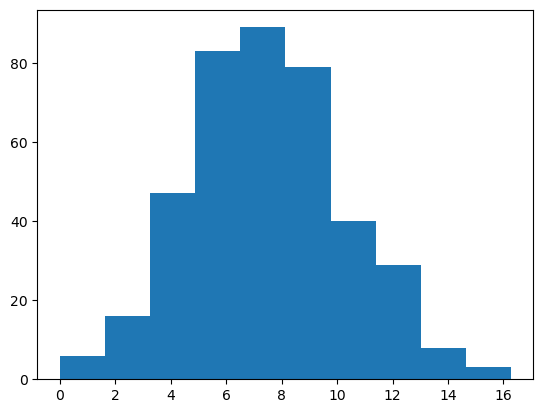

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Category
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [4]:
#Feature Engineering
# Create a new categorical feature based on the 'Sales' column
plt.hist('Sales', data=data)
plt.show()

data_copy = data.copy()
data_copy['Sales_Category'] = pd.cut(x=data_copy['Sales'], bins=[0, 5.39, 9.32, 17], labels=['Low', 'Medium', 'High'], right=False)
data_copy.head()

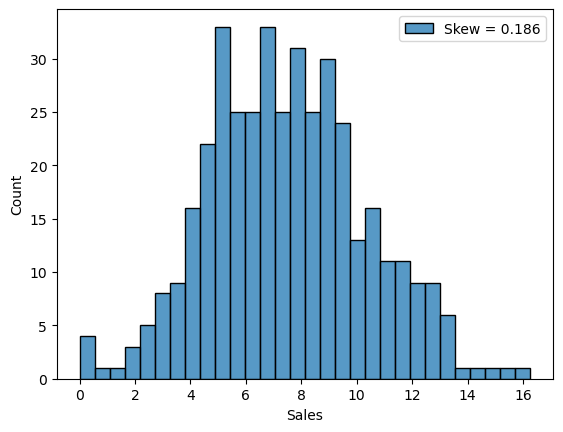

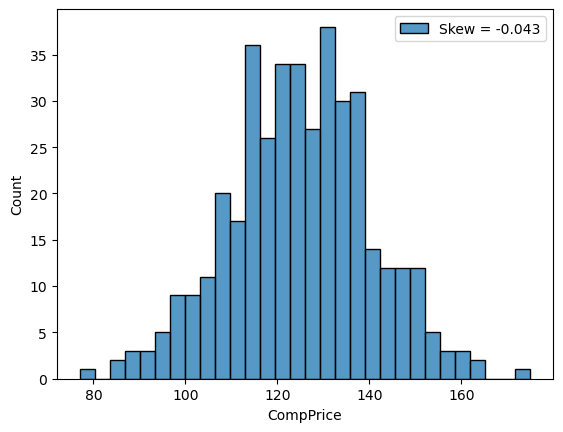

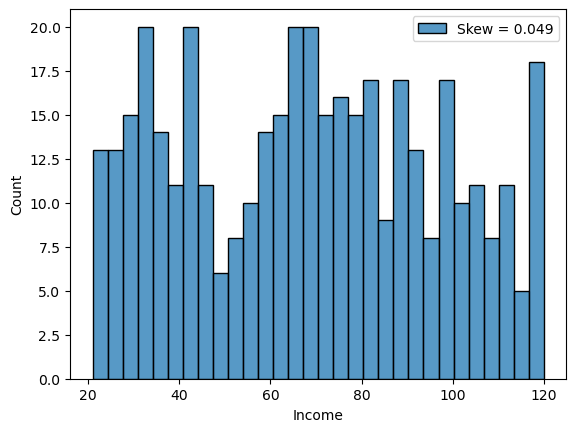

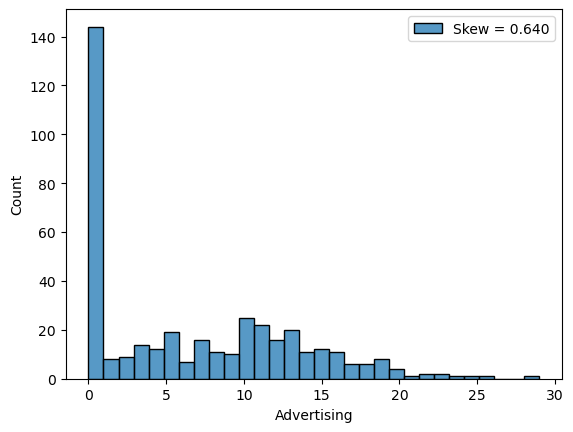

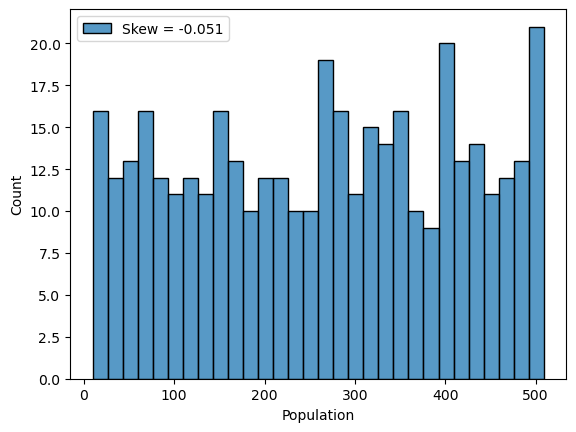

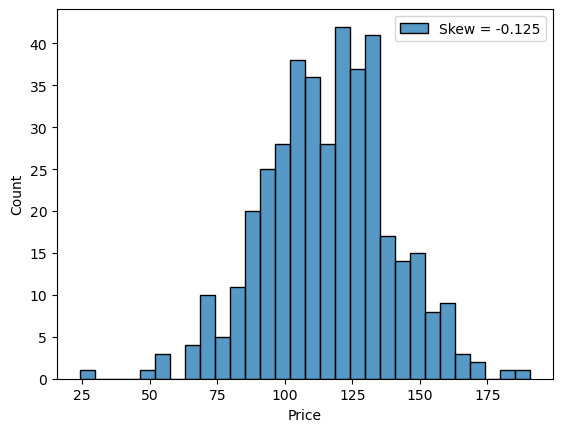

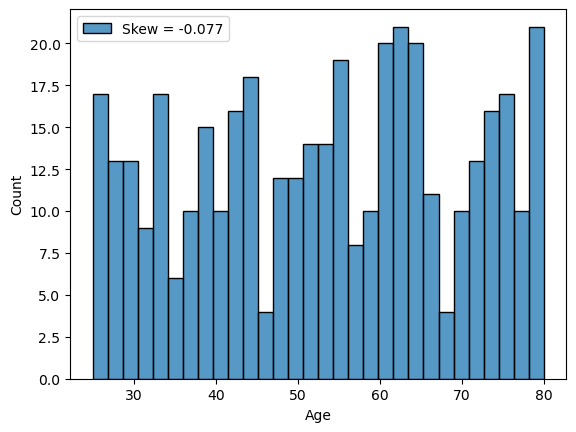

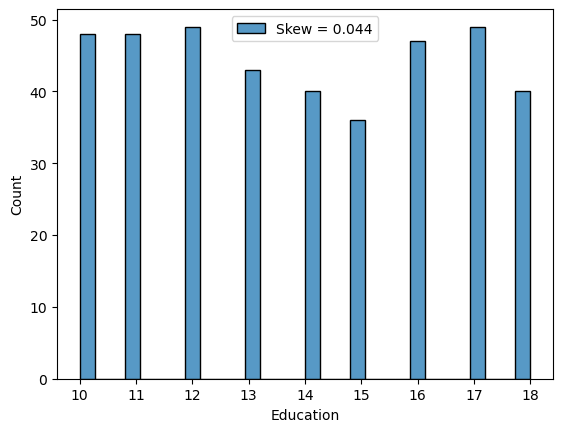

In [5]:
#Exploratory Data Analysis (EDA)
# Check the distribution of the new categorical feature
data_copy['Sales_Category'].value_counts()

# Identify categorical and numerical features
cat_features = data_copy.describe(include=["object", 'category']).columns
num_features = data_copy.describe(include=["int64", "float64"]).columns

# Plot distribution of numerical features
for feature in num_features:
  skewness = data[feature].skew()
  sns.histplot(data[feature], kde=False, label=f'Skew = {skewness:.3f}', bins=30)
  plt.legend(loc='best')
  plt.show()

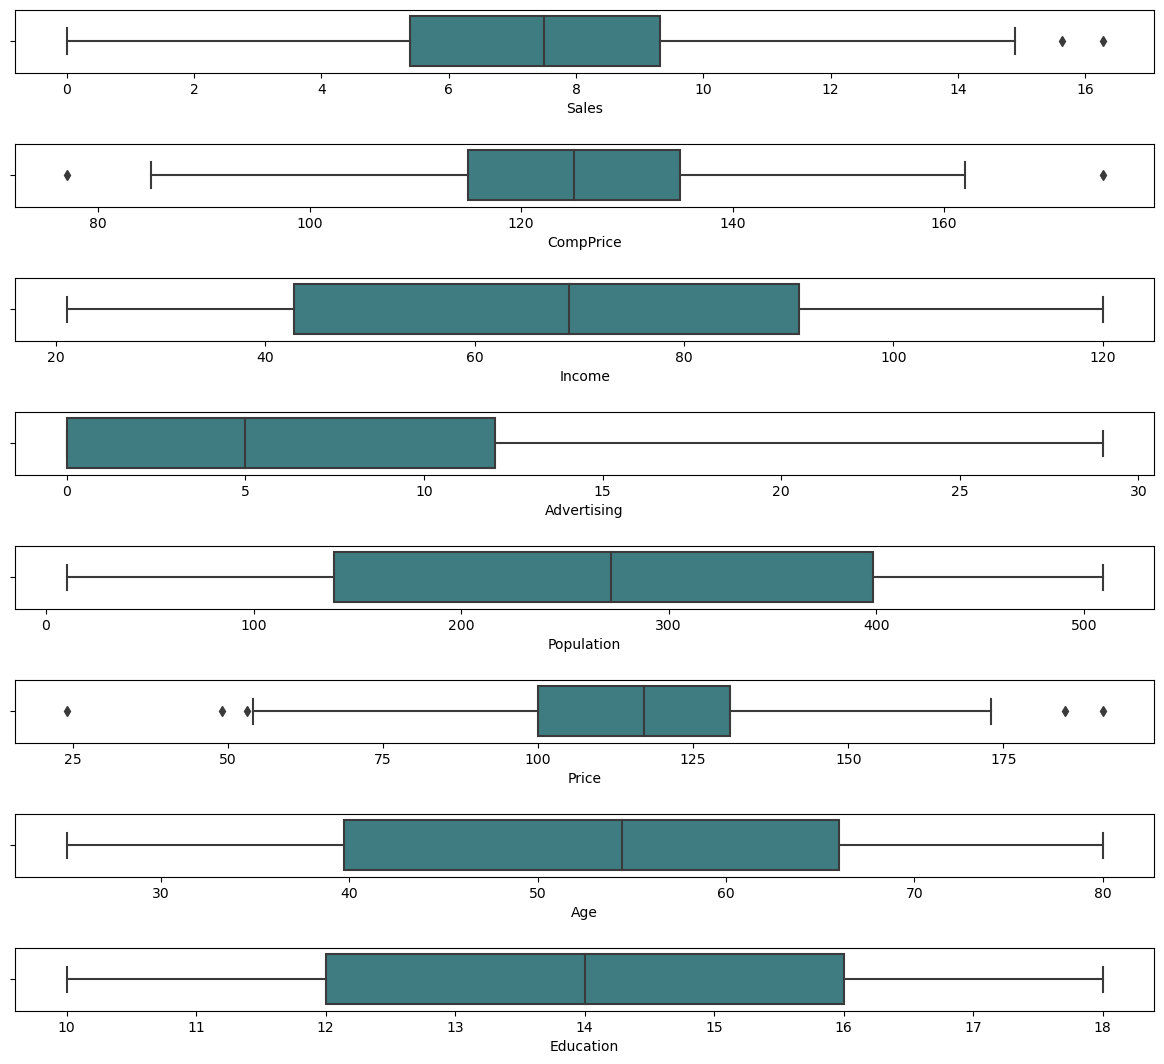

In [6]:
#Outlier Detection
# Visualize outliers using boxplots
outlier_data = data.copy()
fig, axes = plt.subplots(8, 1, figsize=(12, 11), sharex=False, sharey=False)
sns.boxplot(x='Sales', data=outlier_data, palette='crest', ax=axes[0])
sns.boxplot(x='CompPrice', data=outlier_data, palette='crest', ax=axes[1])
sns.boxplot(x='Income', data=outlier_data, palette='crest', ax=axes[2])
sns.boxplot(x='Advertising', data=outlier_data, palette='crest', ax=axes[3])
sns.boxplot(x='Population', data=outlier_data, palette='crest', ax=axes[4])
sns.boxplot(x='Price', data=outlier_data, palette='crest', ax=axes[5])
sns.boxplot(x='Age', data=outlier_data, palette='crest', ax=axes[6])
sns.boxplot(x='Education', data=outlier_data, palette='crest', ax=axes[7])
plt.tight_layout(pad=2.0)

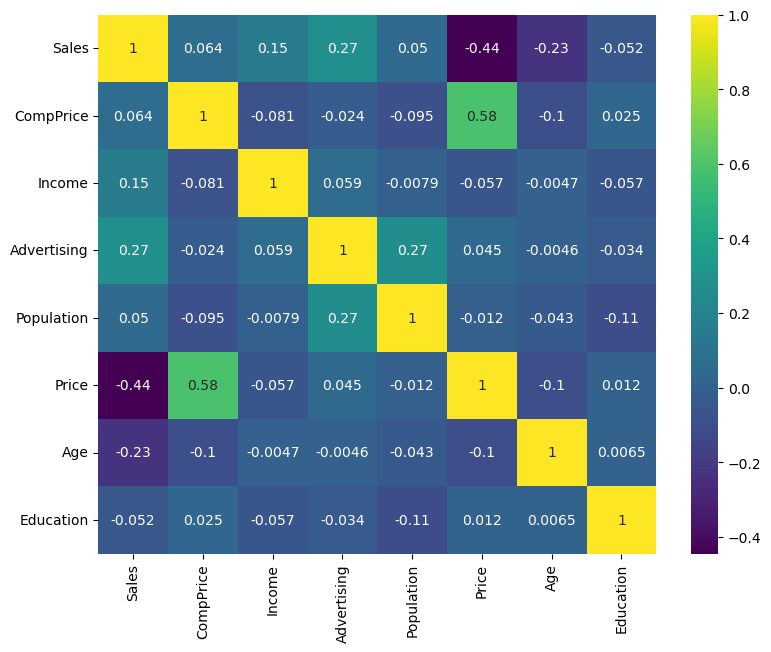

In [7]:
#Correlation Analysis
# Plot a heatmap to visualize correlations between features
plt.figure(figsize=(9, 7))
sns.heatmap(data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

In [8]:
#Data Preprocessing
# Encode categorical variables and prepare data for modeling
data_encoded = data_copy.copy()
data_encoded.drop('Sales', axis=1, inplace=True)
data_encoded = pd.get_dummies(data_encoded.iloc[:, :-1])
data_encoded['Sales'] = data_copy['Sales_Category']

# Label encode the target variable
label_encoder = LabelEncoder()
label_encoder.fit(data_encoded["Sales"])
data_encoded["Sales"] = label_encoder.transform(data_encoded["Sales"])

In [9]:
#Feature Selection
# Select top features using chi-squared test
X = data_encoded.iloc[:, :-1]
y = data_encoded['Sales']
selector = SelectKBest(score_func=chi2, k=4)
selector.fit(X, y)

# Display feature scores
feature_scores = pd.DataFrame(list(zip(selector.scores_, X.columns)), columns=['Score', 'Feature'])
feature_scores.sort_values(by="Score", ascending=False, inplace=True)
feature_scores

,Score,Feature
4,300.881058,Price
2,251.767458,Advertising
3,141.113336,Population
5,106.577639,Age
8,66.174919,ShelveLoc_Good
1,65.145403,Income
7,48.524460,ShelveLoc_Bad
12,13.109136,US_No
9,8.654770,ShelveLoc_Medium
13,7.215106,US_Yes


In [10]:
#Model Building
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# Define a function to print model evaluation scores
def evaluate_model(clf, X_train, y_train, X_test, y_test, train=True):
  if train:
      predictions = clf.predict(X_train)
      report = pd.DataFrame(classification_report(y_train, predictions, output_dict=True))
      print("Training Results:\n" + "="*74)
      print(f"Accuracy: {accuracy_score(y_train, predictions) * 100:.2f}%")
      print("Classification Report:\n", report)
      print("Confusion Matrix:\n", confusion_matrix(y_train, predictions))
  else:
      predictions = clf.predict(X_test)
      report = pd.DataFrame(classification_report(y_test, predictions, output_dict=True))
      print("Testing Results:\n" + "="*74)
      print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
      print("Classification Report:\n", report)
      print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Perform grid search to find the best hyperparameters
param_grid = {
  "criterion": ["gini", "entropy"],
  "splitter": ["best", "random"],
  "max_depth": list(range(1, 10)),
  "min_samples_split": [2, 3, 4],
  "min_samples_leaf": list(range(1, 10))
}

decision_tree = DecisionTreeClassifier(random_state=10)
grid_search = GridSearchCV(decision_tree, param_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
best_tree = DecisionTreeClassifier(**best_params)
best_tree.fit(X_train, y_train)
evaluate_model(best_tree, X_train, y_train, X_test, y_test, train=True)
evaluate_model(best_tree, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Training Results:
Accuracy: 81.88%
Classification Report:
                    0          1           2  accuracy   macro avg  \
precision   0.918033   0.871429    0.767196   0.81875    0.852219   
recall      0.682927   0.762500    0.917722   0.81875    0.787716   
f1-score    0.783217   0.813333    0.835735   0.81875    0.810762   
support    82.000000  80.000000  158.000000   0.81875  320.000000   

           weighted avg  
precision      0.831906  
recall         0.818750  
f1-score       0.816677  
support      320.000000  
Confusion Matrix:
 [[ 56   0  26]
 [  1  61  18]
 [  4   9 145]]
Testing Results:
Accuracy: 66.25%
Classification Report:
               0          1          2  accuracy  macro avg  weighted avg
precision   0.7   0.600000   0.666667    0.6625   0.655556      0.658333
recall  

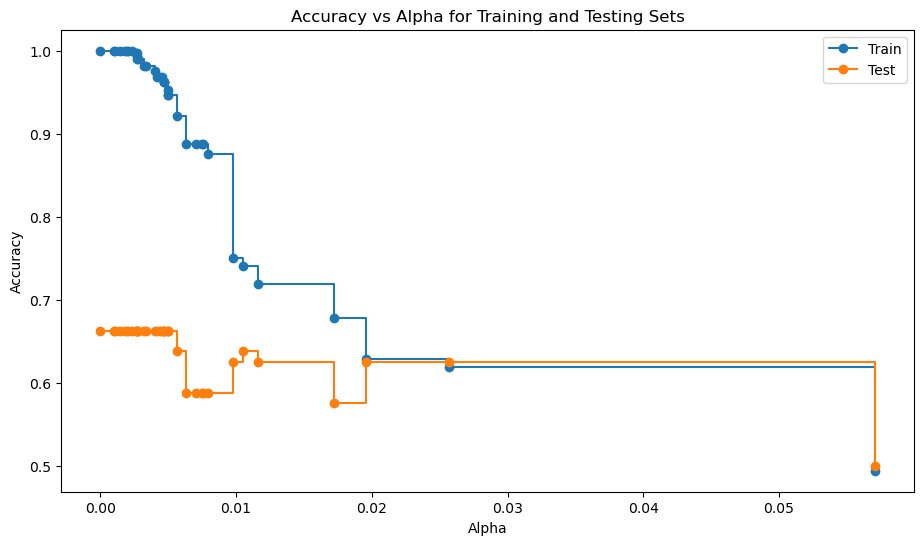

In [11]:
#Model Pruning
# Apply cost complexity pruning to optimize the decision tree
path = best_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train models with different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=10, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)

# Plot accuracy vs alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(11, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train", drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha for Training and Testing Sets")
plt.legend()
plt.show()

In [12]:
#Model Deployment
# Save the trained model using pickle
from pickle import dump
dump(best_tree, open('decision_tree_model.pkl', 'wb'))